# Problem 1

    sex   age Pstatus  Fedu  Medu guardian  studytime  traveltime  failures  \
0     F  18.0       A     4     4   mother          2         2.0         0   
1     F  17.0       T     1     1   father          2         1.0         0   
2     F  15.0       T     1     1   mother          2         1.0         3   
3     F  15.0       T     2     4   mother          3         1.0         0   
4     F   NaN       T     3     3   father          2         1.0         0   
..   ..   ...     ...   ...   ...      ...        ...         ...       ...   
390   M  20.0       A     2     2    other          2         1.0         2   
391   M  17.0       T     1     3   mother          1         2.0         0   
392   M  21.0       T     1     1    other          1         1.0         3   
393   M  18.0       T     2     3   mother          1         3.0         0   
394   M  19.0       T     1     1   father          1         1.0         0   

     famrel  freetime  absences  
0         4      

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'Medu'}>],
       [<Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'traveltime'}>,
        <Axes: title={'center': 'failures'}>],
       [<Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>,
        <Axes: title={'center': 'absences'}>]], dtype=object)

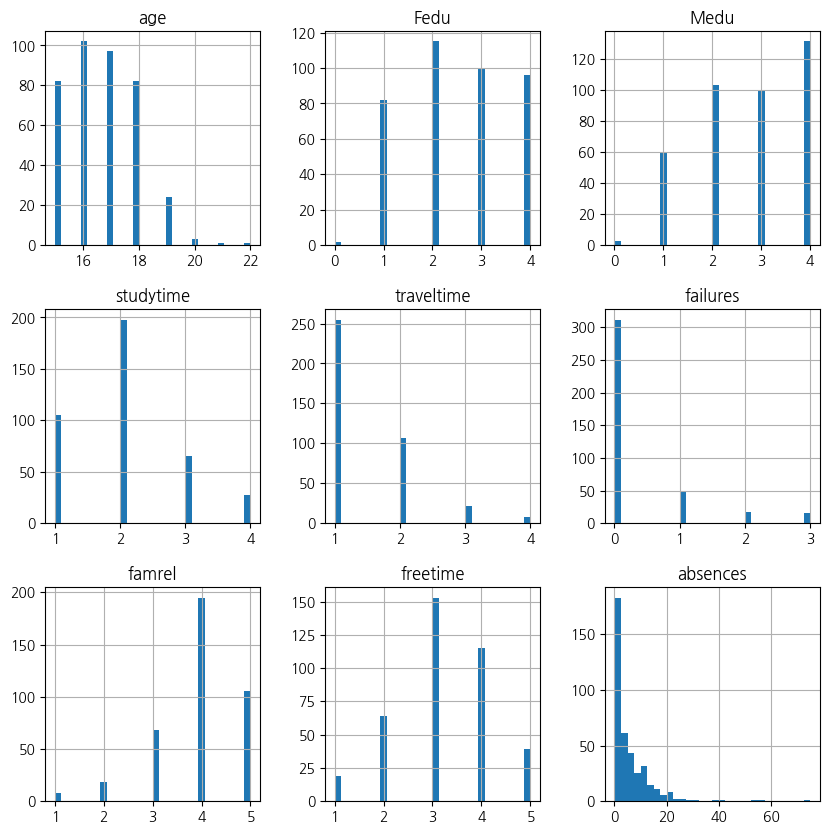

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams["axes.unicode_minus"] = False 
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

df = pd.read_csv("./DATA_ADP24/problem1.csv") 
print(df)
print(df.info())
# df_notobj = df.select_dtypes(exclude=object)
# print(df_notobj)

df.hist(bins=30,figsize=(10,10))


In [2]:
## Encoding: Object --> Number
print(df.info())
df_n = pd.get_dummies(df, dtype=int)
print(df_n)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         392 non-null    float64
 2   Pstatus     395 non-null    object 
 3   Fedu        395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   guardian    395 non-null    object 
 6   studytime   395 non-null    int64  
 7   traveltime  392 non-null    float64
 8   failures    395 non-null    int64  
 9   famrel      395 non-null    int64  
 10  freetime    390 non-null    float64
 11  absences    395 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.2+ KB
None
      age  Fedu  Medu  studytime  traveltime  failures  famrel  freetime  \
0    18.0     4     4          2         2.0         0       4       3.0   
1    17.0     1     1          2         1.0         0       5       3.0   
2    15.0     1     1    

age                3
Fedu               0
Medu               0
studytime          0
traveltime         3
failures           0
famrel             0
freetime           5
absences           0
sex_F              0
sex_M              0
Pstatus_A          0
Pstatus_T          0
guardian_father    0
guardian_mother    0
guardian_other     0
dtype: int64
      age  Fedu  Medu  studytime  traveltime  failures  famrel  freetime  \
4     NaN     3     3          2         1.0         0       4       3.0   
31   15.0     4     4          2         2.0         0       4       NaN   
33   15.0     3     3          2         1.0         0       5       NaN   
66   15.0     4     4          4         NaN         0       1       3.0   
96    NaN     3     4          1         2.0         0       3       3.0   
97   16.0     1     2          2         1.0         0       4       NaN   
153  19.0     2     3          1         1.0         3       4       NaN   
284  17.0     2     2          2         Na

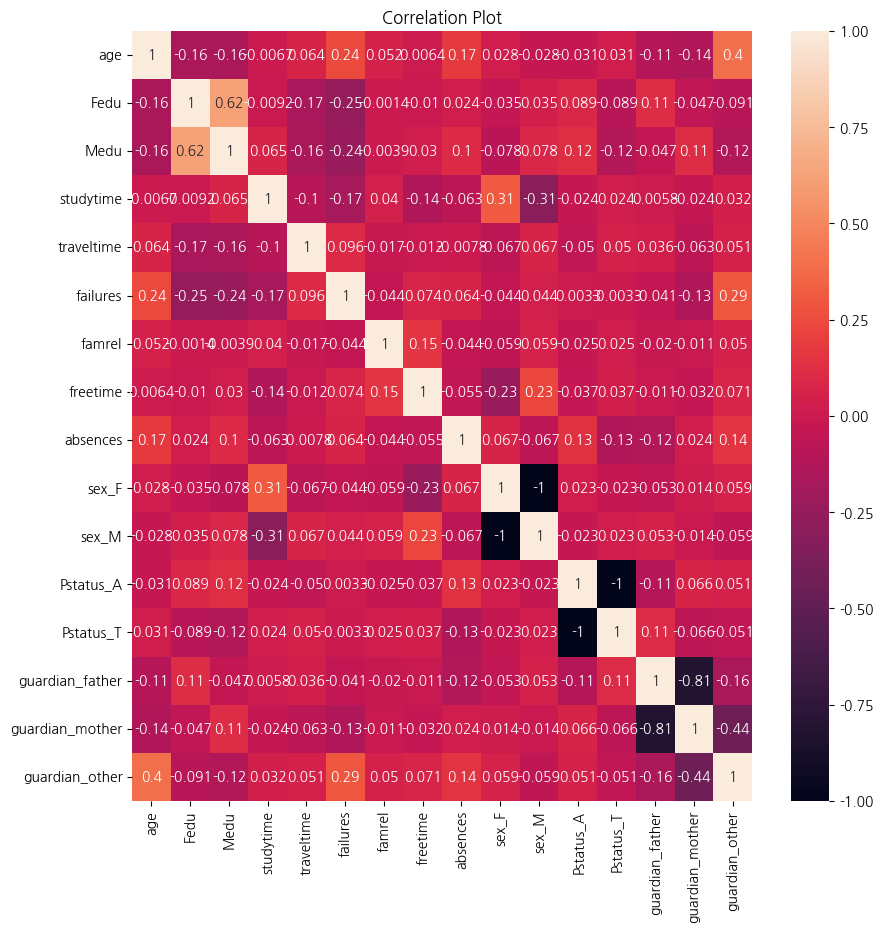

In [3]:
## Null Data Check
print(df_n.isnull().sum())
cond0 = df_n['age'].isnull() | df_n['traveltime'].isnull() | df_n['freetime'].isnull()
null_idx = df_n[cond0].index
print(df_n.loc[null_idx])

## Fill NA
df_n.fillna(df_n.median(), inplace=True)
print(df_n.isnull().sum())
print(df_n.loc[null_idx])

fig = plt.figure(figsize=(10,10))
# sns.pairplot(df)
sns.heatmap(df_n.corr(), annot=True)
plt.title("Correlation Plot")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
Xscaled = std_scaler.fit_transform(df_n)
Xpre = pd.DataFrame(Xscaled, columns = df_n.columns)
print(Xpre.describe())
print(Xpre.head())

X = Xpre.drop('absences', axis=1)
y = df_n[['absences']]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=5)

                age          Fedu          Medu     studytime    traveltime  \
count  3.950000e+02  3.950000e+02  3.950000e+02  3.950000e+02  3.950000e+02   
mean   1.223213e-15 -1.439074e-16  5.396527e-17 -2.113640e-16  1.169248e-16   
std    1.001268e+00  1.001268e+00  1.001268e+00  1.001268e+00  1.001268e+00   
min   -1.335754e+00 -2.320084e+00 -2.514630e+00 -1.235351e+00 -6.396924e-01   
25%   -5.506012e-01 -4.798568e-01 -6.853872e-01 -1.235351e+00 -6.396924e-01   
50%    2.345521e-01 -4.798568e-01  2.292342e-01 -4.228585e-02 -6.396924e-01   
75%    1.019705e+00  4.402569e-01  1.143856e+00 -4.228585e-02  8.041847e-01   
max    4.160319e+00  1.360371e+00  1.143856e+00  2.343844e+00  3.691939e+00   

           failures        famrel      freetime      absences         sex_F  \
count  3.950000e+02  3.950000e+02  3.950000e+02  3.950000e+02  3.950000e+02   
mean  -1.349132e-17 -1.394103e-16  6.295948e-17 -5.396527e-17 -8.094791e-17   
std    1.001268e+00  1.001268e+00  1.001268e+00  1.

In [5]:
from xgboost import XGBRegressor
model_X = XGBRegressor(random_state=3).fit(Xtrain, ytrain)
pred_X = model_X.predict(Xtest)

from sklearn.ensemble import RandomForestClassifier
model_R = RandomForestClassifier(random_state=3).fit(Xtrain, ytrain)
pred_R = model_R.predict(Xtest)

> XGBRegerssor_RootMeanSquaredError:8.75
> XGBRegerssor_RootMeanSquaredError/Mean:184.39 %
> XGBRegerssor_R^2:-0.56
> RandomeForestRegerssor_RootMeanSquaredError:9.97
> RandomForestRegerssor_RootMeanSquaredError/Mean:184.39 %
> RandomForestRegerssor_R^2:-1.02


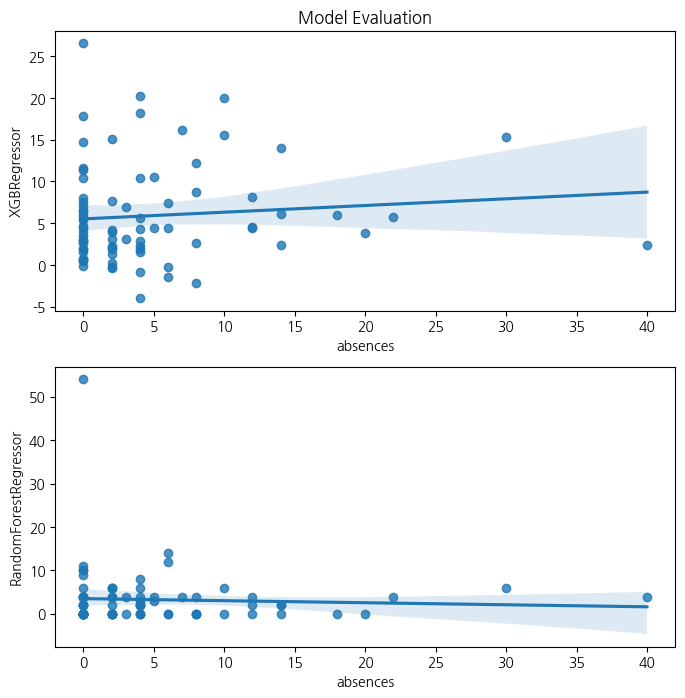

In [6]:
import numpy as np

def rmse_r2(ytest,ypred):
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    rmsep = 100*rmse/float(ytest.mean())
    r2 = r2_score(ytest,ypred)
    return round(rmse,2), round(rmsep,2), round(r2,2)

## XGBRegressor
rmse,rmsep,r2 = rmse_r2(ytest, pred_X)
print(f'> XGBRegerssor_RootMeanSquaredError:{rmse}')
print(f'> XGBRegerssor_RootMeanSquaredError/Mean:{rmsep} %')
print(f'> XGBRegerssor_R^2:{r2}')

## RandomForestRegressor
rmse,remsep,r2 = rmse_r2(ytest, pred_R)
print(f'> RandomeForestRegerssor_RootMeanSquaredError:{rmse}')
print(f'> RandomForestRegerssor_RootMeanSquaredError/Mean:{rmsep} %')
print(f'> RandomForestRegerssor_R^2:{r2}')

## Result Plot
fig,axes = plt.subplots(2,1,figsize=(8,8))
sns.regplot(x=ytest, y=pred_X, ax = axes[0])
axes[0].set_ylabel('XGBRegressor')
axes[0].set_title('Model Evaluation')
sns.regplot(x=ytest, y=pred_R, ax = axes[1])
axes[1].set_ylabel('RandomForestRegressor')
plt.show()

### 1-1 데이터 EDA 및 시각화
* data의 header, information, histogram 확인 실시  

### 1-2 결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라
* 결측치 컬럼 확인 및 중위수를 사용한 결측치 대체    
* 각 data간 상대적 크기 차이에 따른 편향 오류를 예방하기 위해 정규화(StandardScaler 적용)  
* correlation 분석 결과, 목표치 absences 와 feature 항목들관의 선형 상관성이 매우 낮음  
* correlation 분석 결과, feature 들간의 상관성이 충분히 낮음(다중공선성은 없는 것으로 판단)  

### 1-3 결석일수 예측모델을 2개 제시하고 선택한 근거 설명
* absences 와 feature 들간의 선형 상관성이 매우 낮으므로 비선형 모델 선정 필요  
* 예측 모델 선정 1)XGBoost, 2) Random Forest  

### 1-4 선정한 모델 2가지 생성 및 모델의 평가 기준을 선정하고 선정 이유 설명
* 2개 모델 모두 Root Mean Squread Error 의 크기가 매우 크게 평가되어, 예측 모델로 사용 불가  
* 2개 모델 모두 R^2 값 계산 및 Graph 확인 결과, 예측 모델과 실제값과의 차이가 매우 크게 나타남  

### 1-5 모델이 다양한 일상 상황에서도 잘 동작한다는 것을 설명하고 시각화 하라
* 일상 상황 적용 불가(?)  

### 1-6 모델 최적화 방안에 대해 구체적으로 설명하라
* 목표치 absences 와 인과 관계가 있는 feature set 구성 필요(Correlation 향상 필요) 

# Problem 2

    광고횟수 광고비  매출액
0      2  낮음   15
1      3  낮음   16
2      4  낮음   17
3      4  높음   18
4      5  높음   20
5      6  높음   22
6      7  낮음   24
7      9  높음   26
8     11  높음   28
9     12  낮음   29
10    13  높음   31
            광고횟수        매출액
count  11.000000  11.000000
mean    6.909091  22.363636
std     3.806693   5.608435
min     2.000000  15.000000
25%     4.000000  17.500000
50%     6.000000  22.000000
75%    10.000000  27.000000
max    13.000000  31.000000
    광고횟수  매출액  광고비_낮음  광고비_높음
0      2   15       1       0
1      3   16       1       0
2      4   17       1       0
3      4   18       0       1
4      5   20       0       1
5      6   22       0       1
6      7   24       1       0
7      9   26       0       1
8     11   28       0       1
9     12   29       1       0
10    13   31       0       1


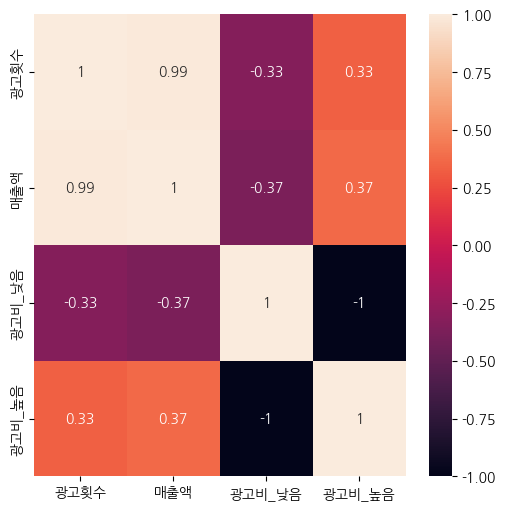

Index(['광고횟수', '매출액', '광고비_낮음', '광고비_높음'], dtype='object')


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams["axes.unicode_minus"] = False 

df = pd.read_csv('./DATA_ADP24/problem2.csv', encoding='cp949')
print(df)
print(df.describe())

df_n = pd.get_dummies(df, dtype=int)
print(df_n)

fig = plt.figure(figsize=(6,6))
# sns.pairplot(df)
sns.heatmap(df_n.corr(), annot=True)
plt.show()

print(df_n.columns)

X = df_n.drop('매출액', axis=1)
y = df_n['매출액']
from sklearn.linear_model import LinearRegression
model_l = LinearRegression().fit(X,y)
pred_l = model_l.predict(X)

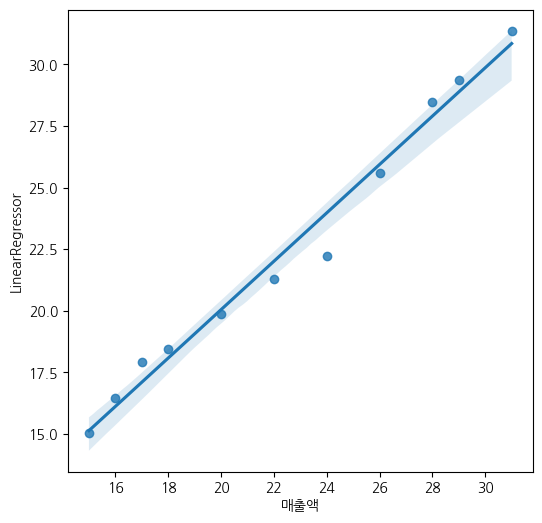

> LinearRegerssor_RootMeanSquaredError:0.71
> LinearRegerssor_RootMeanSquaredError/Mean:3.19 %
> LinearRegerssor_R^2:0.98


In [8]:
fig, ax = plt.subplots(figsize=(6,6))
sns.regplot(x=y, y=pred_l)
ax.set_ylabel('LinearRegressor')
plt.show()

rmse, rmsep, r2 = rmse_r2(y, pred_l)
print(f'> LinearRegerssor_RootMeanSquaredError:{rmse}')
print(f'> LinearRegerssor_RootMeanSquaredError/Mean:{rmsep} %')
print(f'> LinearRegerssor_R^2:{r2}')

### 2-1 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정
* 광고비에 대한 One-hot encoding 을 적용하여, 다중회귀 수행  

### 2-2 회귀식이 유의한지 판단
* LinearRegressor 모델과 실제 매출액간의 R^2 가 매우 높아 예측 모델로 활용 가능  
* 모델의 Root Mean Squared Error 가 매출액  평균값의 3.2%  수준임.

# Problem 3

## A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, 
## B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면  
## 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65

[가설 수립]
* Ho : A 생산라인과 B 생산라인의 제품 평균값이 같다.
* Ha : A 생산라인과 제품 평균값이 B 생산라인의 제품의 평균값 보다 크다.

1) Z=A-B로 새로운 통계 변수 설정 및 정규 분포로 가정함  
2) Z(0.05) = 1.65 를 기준으로 단측 검증 실시  
3) 정규 분포 가정을 위해, 평균 계산 Sampling Data 개수 n=30 으로 설정 (Central Limit Theorem)

In [9]:
## z=A-B로 새로운 통계 변수 설정 및 정규 분포로 가정함
## z(0.05) = 1.65 를 기준으로 단측 검증 실시
ma = 5.7
sa = 0.03
mb = 5.6
sb = 0.04
n = 30

myu_ab = ma-mb
var_ab = sa**2/n +sb**2/n
sig_ab = var_ab**(0.5)

Zstat = myu_ab/sig_ab
print(f'Zstat of A-B: {round(Zstat,2)}')

Zstat of A-B: 10.95


# 검증 결과
* Z 통계량이 Z(0.05) 보다 매우 큰 값을 갖는다.
* 대립 가설 선택:  A 생산라인과 제품 평균값이 B 생산라인의 제품의 평균값 보다 크다. 

# Problme 4

## 바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해 양성으로 예측된 사람이 실제로 양성일 확률을 구하라

In [10]:
# P(A|B) = P(B|A)*P(A)/P(B)
# A:실제 바이러스 양성의 경우
# B:바이러스 양성으로 예측되는 경우

P_A = (370+15)/(370+15+10+690)
P_B = (370+10)/(370+15+10+690)
P_BA = (370)/(370+15)
P_AB = P_BA*P_A/P_B

print(f'바이러스 양성으로 예측된 사람이 실제 양성일 확률: {round(P_AB,2)}')

바이러스 양성으로 예측된 사람이 실제 양성일 확률: 0.97


# Problem 5

정규분포에서 표폰을 추출함[Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306]  
데이터(9개) : [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3 4.4, 4.7]

### 5-1 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라

In [11]:
#  sigma of population is unknown : t distribution
import numpy as np
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]
n = len(data)
myu = np.mean(data)
sigma = np.std(data)
se = sigma/np.sqrt(n)
myu, sigma
t_c = 2.306
low_l = myu - se*t_c
high_l = myu + se*t_c

print(f' [95% 신뢰 구간] \n (모분산을 모르는 경우): {round(low_l,2)} <= myu <= {round(high_l,2)}')

 [95% 신뢰 구간] 
 (모분산을 모르는 경우): 3.5 <= myu <= 4.28


### 5-2 sigma = 0.04인걸 알고있을때의 95% 신뢰구간을 구하라 

In [12]:
#  sigma of population is known : normal Z distribution
z_c = 1.96
sigma_z = 0.04
sez = sigma_z/np.sqrt(n)
low_lz = myu - sez*z_c
high_lz = myu + sez*z_c

print(f' [95% 신뢰 구간] \n (sigma = 0.04): {round(low_lz,2)} <= myu <= {round(high_lz,2)}')

 [95% 신뢰 구간] 
 (sigma = 0.04): 3.86 <= myu <= 3.92
